In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sweet-pumkin-diseaseimages/Thesis Pictures/Powdery mildew/images (2).jpg
/kaggle/input/sweet-pumkin-diseaseimages/Thesis Pictures/Powdery mildew/images (13)(1).jpg
/kaggle/input/sweet-pumkin-diseaseimages/Thesis Pictures/Powdery mildew/images (4).jpg
/kaggle/input/sweet-pumkin-diseaseimages/Thesis Pictures/Powdery mildew/images(1).jpg
/kaggle/input/sweet-pumkin-diseaseimages/Thesis Pictures/Powdery mildew/images (13).jpg
/kaggle/input/sweet-pumkin-diseaseimages/Thesis Pictures/Powdery mildew/images (23)(1).jpg
/kaggle/input/sweet-pumkin-diseaseimages/Thesis Pictures/Powdery mildew/images (9).jpg
/kaggle/input/sweet-pumkin-diseaseimages/Thesis Pictures/Powdery mildew/images (22).jpg
/kaggle/input/sweet-pumkin-diseaseimages/Thesis Pictures/Powdery mildew/images (5).jpg
/kaggle/input/sweet-pumkin-diseaseimages/Thesis Pictures/Powdery mildew/pumpkin-powdery-mildew.jpg
/kaggle/input/sweet-pumkin-diseaseimages/Thesis Pictures/Powdery mildew/images (12)(1).jpg
/kaggle/input/swee

In [2]:
from fastai.vision.all import *

In [3]:
base_path = Path('/kaggle/input/sweet-pumkin-diseaseimages/Thesis Pictures')

In [4]:
dls = ImageDataLoaders.from_folder(
    base_path,
    valid_pct=0.2,
    item_tfms=Resize(224),
    bacth_tfms=aug_transforms(mult=2)
)

In [5]:
learn = vision_learner(dls, resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 139MB/s]


In [6]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,3.522472,1.561403,0.548961,03:42


epoch,train_loss,valid_loss,accuracy,time
0,1.784988,1.341544,0.599407,05:23
1,1.384306,1.251225,0.620178,05:26
2,1.074977,1.224892,0.637982,05:20
3,0.869479,1.248453,0.640950,05:24
4,0.703875,1.248611,0.637982,04:14


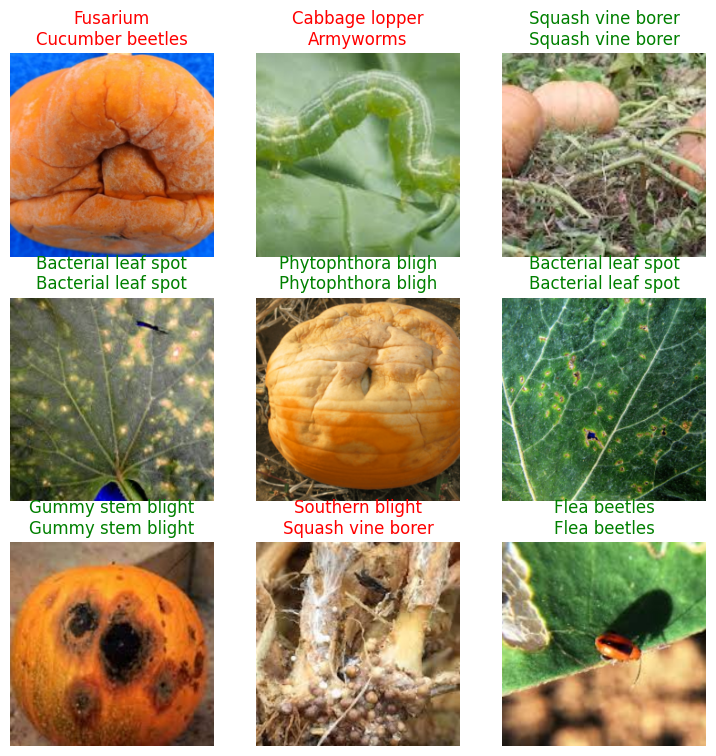

In [7]:
learn.show_results()

In [8]:
learn.export('/kaggle/working/pumpkin_classifier_model.pkl')